<a href="https://colab.research.google.com/github/TrippleA001/GOMYCODE-Data-Science-Bootcamp-V1/blob/main/API_to_Pandas_Dataframe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

What You're Aiming For

In this checkpoint, we are going to practice consuming public APIs through the NASA public APIs portal.

Portal description : The objective of this portal is to make NASA data, including imagery, eminently accessible to application developers and data professionals. Before starting to use its APIs endpoints, it's mandatory that you generate your API KEY and store it somewhere for later use. The API key acts as the user identifier when requesting the API. To get your KEY, fill in the provided form with your personal information, and then we shall receive an email containing your personal API KEY.

➡️ NASA API PORTAL

https://i.imgur.com/hisTmpk.png




Instructions

Go to the NASA API portal and generate your API KEY
Import the requests package and store your API KEY in variable
Go back to portal website and click on 'browse APIs'
Click on the first dropdown menu, named 'APOD' and read its documentation
Follow the provided documentation to ask the API endpoint for the astronomy picture of the day. Get then display the image on your notebook.
Go through the list of the provided API endpoints once again and select 'Asteroids - NeoWs' option. Store the results in a pandas dataframe
Do the necessary data pre-processing tasks on the previous result in order to get a clean dataframe with the following columns :
Asteroid ID
Asteroid name
The Minimal estimated diameter in Kilometre
Absolute_magnitude
Relative_velocity(km/s)
Try to export the new dataframe into a CSV file and share it with your colleagues

In [ ]:
pip install requests

In [ ]:
import requests
import json
import pandas as pd



In [ ]:
from google.colab import userdata
NASA_API_KEY = userdata.get('M_KEY')

In [ ]:
#Api url
url = 'https://api.nasa.gov/planetary/apod'

In [ ]:
parameters = {
    'api_key': NASA_API_KEY,
    'date': '2024-03-14'
}


In [ ]:
# Make a GET request to the APOD API
response = requests.get(url, params=parameters)

In [ ]:
response.text

'{"copyright":"El Cielo de Canarias","date":"2024-03-14","explanation":"What phase of the Moon is 3.14 radians from the Sun? The Full Moon, of course. Even though the Moon might look full for several days, the Moon is truly at its full phase when it is Pi radians (aka 180 degrees) from the Sun in ecliptic longitude. That\'s opposite the Sun in planet Earth\'s sky. Rising as the Sun set on March 9, 2020, only an hour or so after the moment of its full phase, this orange tinted and slightly flattened Moon still looked full. It was photographed opposite the setting Sun from Teide National Park on the Canary Island of Tenerife. Also opposite the setting Sun, seen from near the Teide volcano peak about 3,500 meters above sea level, is the mountain\'s rising triangular shadow extending into Earth\'s dense atmosphere. Below the distant ridge line on the left are the white telescope domes of Teide Observatory. Again Pi radians from the Sun, on March 25 the Full Moon will dim slightly as it gli

In [ ]:
json_data = json.loads(response.text)
print(json_data)

{'copyright': 'El Cielo de Canarias', 'date': '2024-03-14', 'explanation': "What phase of the Moon is 3.14 radians from the Sun? The Full Moon, of course. Even though the Moon might look full for several days, the Moon is truly at its full phase when it is Pi radians (aka 180 degrees) from the Sun in ecliptic longitude. That's opposite the Sun in planet Earth's sky. Rising as the Sun set on March 9, 2020, only an hour or so after the moment of its full phase, this orange tinted and slightly flattened Moon still looked full. It was photographed opposite the setting Sun from Teide National Park on the Canary Island of Tenerife. Also opposite the setting Sun, seen from near the Teide volcano peak about 3,500 meters above sea level, is the mountain's rising triangular shadow extending into Earth's dense atmosphere. Below the distant ridge line on the left are the white telescope domes of Teide Observatory. Again Pi radians from the Sun, on March 25 the Full Moon will dim slightly as it gli

In [ ]:
print(json_data["title"],json_data["url"])

Moon Pi and Mountain Shadow https://apod.nasa.gov/apod/image/2403/MoonriseShadowDLopez_1024.jpg


In [ ]:
image_url = json_data['hdurl']

In [ ]:
!wget $image_url

--2024-03-15 17:01:26--  https://apod.nasa.gov/apod/image/2403/MoonriseShadowDLopez_1.jpg
Resolving apod.nasa.gov (apod.nasa.gov)... 129.164.179.22, 2001:4d0:2310:150::22
Connecting to apod.nasa.gov (apod.nasa.gov)|129.164.179.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 360831 (352K) [image/jpeg]
Saving to: ‘MoonriseShadowDLopez_1.jpg.1’

MoonriseShadowDLope 100%[===================>] 352.37K  1.52MB/s    in 0.2s    

2024-03-15 17:01:27 (1.52 MB/s) - ‘MoonriseShadowDLopez_1.jpg.1’ saved [360831/360831]



In [ ]:
image_data = image_url.split("/")
image_name = image_data[-1]
image_name

'MoonriseShadowDLopez_1.jpg'

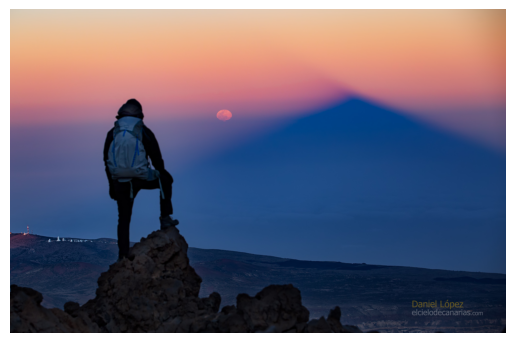

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread(image_name) #Replace "image.jpg" with the path of your image
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
url2= "https://api.nasa.gov/neo/rest/v1/feed"

In [ ]:
parameters2 = {
    'api_key': NASA_API_KEY,
    'start_date': '2024-02-04',
    'end_date': '2024-02-09'
}

In [ ]:
# Make a GET request to the APOD API
response2 = requests.get(url2, params=parameters2)
response2

<Response [200]>

Do the necessary data pre-processing tasks on the previous result in order to get a clean dataframe with the following columns :
Asteroid ID
Asteroid name
The Minimal estimated diameter in Kilometre
Absolute_magnitude
Relative_velocity(km/s)



In [ ]:
json_data2["near_earth_objects"]['2024-02-04'][0]['close_approach_data'][0]['relative_velocity']['kilometers_per_second']

'10.9204815314'

In [ ]:
json_data2["near_earth_objects"]['2024-02-04'][0]['estimated_diameter']['kilometers']['estimated_diameter_min']

0.0160160338

In [ ]:
json_data2["near_earth_objects"]['2024-02-04'][0]["name"]

'(2007 RF1)'

In [ ]:
json_data2["near_earth_objects"]['2024-02-04'][0]["id"]

'3383667'

In [ ]:
json_data2 = json.loads(response2.text)
json_data2

{'links': {'next': 'http://api.nasa.gov/neo/rest/v1/feed?start_date=2024-02-09&end_date=2024-02-14&detailed=false&api_key=eNS888Q2ZwMB5L4XDoFat02MH67UdyT6B13RBXYP',
  'previous': 'http://api.nasa.gov/neo/rest/v1/feed?start_date=2024-01-30&end_date=2024-02-04&detailed=false&api_key=eNS888Q2ZwMB5L4XDoFat02MH67UdyT6B13RBXYP',
  'self': 'http://api.nasa.gov/neo/rest/v1/feed?start_date=2024-02-04&end_date=2024-02-09&detailed=false&api_key=eNS888Q2ZwMB5L4XDoFat02MH67UdyT6B13RBXYP'},
 'element_count': 119,
 'near_earth_objects': {'2024-02-05': [{'links': {'self': 'http://api.nasa.gov/neo/rest/v1/neo/2347813?api_key=eNS888Q2ZwMB5L4XDoFat02MH67UdyT6B13RBXYP'},
    'id': '2347813',
    'neo_reference_id': '2347813',
    'name': '347813 (2002 NP1)',
    'nasa_jpl_url': 'https://ssd.jpl.nasa.gov/tools/sbdb_lookup.html#/?sstr=2347813',
    'absolute_magnitude_h': 17.66,
    'estimated_diameter': {'kilometers': {'estimated_diameter_min': 0.7808272775,
      'estimated_diameter_max': 1.7459828712},
 

In [ ]:
all_near_earth_objects = json_data2['near_earth_objects']['2024-02-05']
near_earth_objects

[{'links': {'self': 'http://api.nasa.gov/neo/rest/v1/neo/2347813?api_key=eNS888Q2ZwMB5L4XDoFat02MH67UdyT6B13RBXYP'},
  'id': '2347813',
  'neo_reference_id': '2347813',
  'name': '347813 (2002 NP1)',
  'nasa_jpl_url': 'https://ssd.jpl.nasa.gov/tools/sbdb_lookup.html#/?sstr=2347813',
  'absolute_magnitude_h': 17.66,
  'estimated_diameter': {'kilometers': {'estimated_diameter_min': 0.7808272775,
    'estimated_diameter_max': 1.7459828712},
   'meters': {'estimated_diameter_min': 780.8272774914,
    'estimated_diameter_max': 1745.9828711568},
   'miles': {'estimated_diameter_min': 0.4851834262,
    'estimated_diameter_max': 1.0849031226},
   'feet': {'estimated_diameter_min': 2561.7693650848,
    'estimated_diameter_max': 5728.2904430061}},
  'is_potentially_hazardous_asteroid': False,
  'close_approach_data': [{'close_approach_date': '2024-02-05',
    'close_approach_date_full': '2024-Feb-05 03:32',
    'epoch_date_close_approach': 1707103920000,
    'relative_velocity': {'kilometers_per

In [ ]:
near_earth_objects['id']
near_earth_objects['name']
near_earth_objects['estimated_diameter']['kilometers']['estimated_diameter_min']
near_earth_objects['absolute_magnitude_h']
near_earth_objects['close_approach_data'][0]['relative_velocity']['kilometers_per_second']

'1.9982604604'

In [ ]:
df = pd.DataFrame()
for days in json_data2["near_earth_objects"]:
  daily_near_earth_object = json_data2["near_earth_objects"][days]
  for near_earth_objects in daily_near_earth_object:
    temp = pd.DataFrame(
    {'Asteroid ID': [near_earth_objects['id']],
    'Asteroid name': [near_earth_objects['name']],
    'Minimal estimated diameter in Kilometre': [near_earth_objects['estimated_diameter']['kilometers']['estimated_diameter_min']],
    'Absolute_magnitude': [near_earth_objects['absolute_magnitude_h']],
    'Relative velocity(km/s)': [near_earth_objects['close_approach_data'][0]['relative_velocity']['kilometers_per_second']]
    })
    print(f"{temp.values} added")
# Combine all DataFrames into a single DataFrame
    df = pd.concat([df, temp], ignore_index= True)
  print(f"data for {days} complete")
df

[['2347813' '347813 (2002 NP1)' 0.7808272775 17.66 '13.3104163945']] added
[['2444627' '444627 (2006 WU)' 0.4116754573 19.05 '1.9982604604']] added
[['2451370' '451370 (2011 AK5)' 0.1344481952 21.48 '8.2382303218']] added
[['3440771' '(2008 WZ94)' 0.235806068 20.26 '16.1492348048']] added
[['3557844' '(2011 DW)' 0.0766575574 22.7 '14.872591907']] added
[['3616697' '(2012 VN6)' 0.1420872067 21.36 '19.5250537238']] added
[['3719865' '(2015 KQ57)' 0.0978486812 22.17 '13.7739572245']] added
[['3776069' '(2017 MZ3)' 0.0868070458 22.43 '25.3080501382']] added
[['3802006' '(2018 FB2)' 0.0201629919 25.6 '5.5296784427']] added
[['54341595' '(2023 CE3)' 0.0242412481 25.2 '15.2642183636']] added
[['54377840' '(2023 QN2)' 0.0316632126 24.62 '13.7193327839']] added
[['54392655' '(2023 TZ6)' 0.0137579896 26.43 '4.6265154609']] added
[['54419609' '(2024 AJ2)' 0.1586919792 21.12 '23.2274071715']] added
[['54423045' '(2024 BL3)' 0.0337718597 24.48 '15.5068172938']] added
[['54423051' '(2024 BS3)' 0.035

,Asteroid ID,Asteroid name,Minimal estimated diameter in Kilometre,Absolute_magnitude,Relative velocity(km/s)
0,2347813,347813 (2002 NP1),0.780827,17.66,13.3104163945
1,2444627,444627 (2006 WU),0.411675,19.05,1.9982604604
2,2451370,451370 (2011 AK5),0.134448,21.48,8.2382303218
3,3440771,(2008 WZ94),0.235806,20.26,16.1492348048
4,3557844,(2011 DW),0.076658,22.70,14.872591907
...,...,...,...,...,...
114,54354510,(2023 GA3),0.122055,21.69,11.5120392025
115,54376990,(2023 QF),0.009132,27.32,4.8171074594
116,54424572,(2024 CK1),0.003569,29.36,12.0585935386
117,54426071,(2024 CG2),0.065246,23.05,9.1781886058
